# Mouvement Retrograde de Mars
## Données et Initialisation

In [5]:
# Importer les modules requises
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Tailles des images par densité
size = 115

# Charger les données depuis le fichier .csv
Data = pd.read_csv("DataMars.csv", comment = "#")

# Séparation des données en variables
Date = Data["Date"] 
Longitude = Data["Longitude (decimal)"]

# Changer le format des dates
N = np.arange(0, len(Date), 1)
for i in N:
    Date.iat[i] = pd.to_datetime(Date.iat[i], format="%Y-%m-%d")
    
print(Date)

0      2015-03-01 00:00:00
1      2015-03-02 00:00:00
2      2015-03-03 00:00:00
3      2015-03-04 00:00:00
4      2015-03-05 00:00:00
              ...         
895    2017-08-12 00:00:00
896    2017-08-13 00:00:00
897    2017-08-14 00:00:00
898    2017-08-15 00:00:00
899    2017-08-16 00:00:00
Name: Date, Length: 900, dtype: object


## Visualisation des Données Brutes
Afin d'étudier le mouvement rétrograde de Mars, on commence par visualiser les données observées.

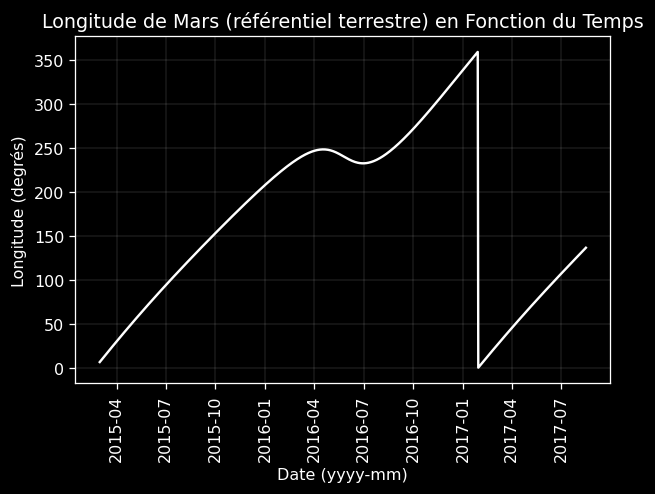

In [6]:
# Création de l'image
plt.figure(dpi = size)

# Graphique de la longitude de mars vue depuis la terre en fonction du temps
plt.plot(Date, Longitude, "w")

# Rajouter les titre et changer le style du graphique
plt.style.use("dark_background")
plt.title("Longitude de Mars (référentiel terrestre) en Fonction du Temps")
plt.xlabel("Date (yyyy-mm)")
plt.ylabel("Longitude (degrés)")
plt.grid(visible = True, linewidth=0.1)
plt.xticks(rotation = 90)

# Afficher l'image
plt.show()

## Modèle de Deux Mouvement Circulaires

Pour créer un modèle on supposera que les deux planètes sont en mouvement circulaire uniforme et heliocentrique dans le même plan (plan écliptique). Leur mouvement peut donc être se décrire par des équations usuelles d'un mouvement circulaire uniforme à deux dimensions:

{$ r = R, \theta = \omega t + \phi $} avec $ \omega = \frac{2\pi}{T}$
\
{$X(t) = rcos(\theta), Y(t) = rsin(\theta)$}
\
$\therefore$ {$X(t) = Rcos(\frac{2\pi}{T}t + \phi), Y(t) = Rsin(\frac{2\pi}{T}t + \phi)$}
\
$\therefore \theta = {tan}^{-1}(\frac{Y(t)}{X(t)})$

avec $R$ le rayon de l'orbite, $T$ la période, $\omega$ la vitesse angulaire, et $\theta$ la longitude. On mettra, dans la suite le déphasage dans l'argument du temps pour faciliter la synchronisation des graphiques ($\phi_0 = \frac{2(\pi)}{T} \times (phase)$).

On fera un changement de référentiel pour que le modèle soit géocentrique:

$X_{Mars Geo} = X_{Mars Helio} - X_{Terre Helio}$
\
$Y_{Mars Geo} = Y_{Mars Helio} - Y_{Terre Helio}$


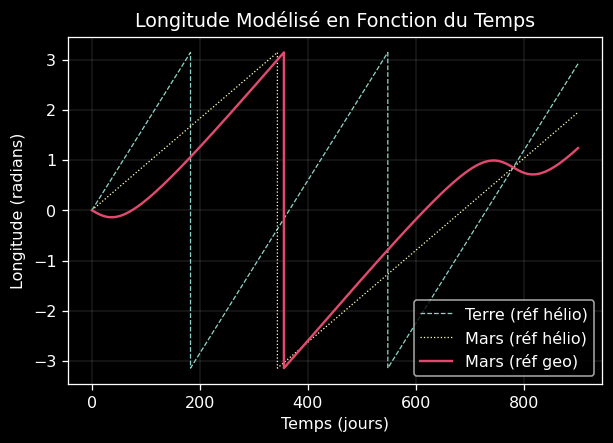

900000


In [7]:
# Variables de temps et de phase 
t = np.arange(0, 900, 10**(-3))
phase = -np.ones_like(t)*344.5

#Definition des constantes (les rayons et périodes)
R_T = np.ones_like(t)
R_M = 1.52371*np.ones_like(t)
T_T = 365.256*np.ones_like(t)
T_M = 686.885*np.ones_like(t)



# Coordonnées cartésiennes et longitude de la Terre (Helio)
X_T = R_T * np.cos(2*np.pi*(t)/T_T)
Y_T = R_T * np.sin(2*np.pi*(t)/T_T)

Longitude_T = np.arctan2(Y_T, X_T)



# Coordonnées cartésiennes et longitude de Mars (Helio)
X_M = R_M * np.cos(2*np.pi*(t)/T_M)
Y_M = R_M * np.sin(2*np.pi*(t)/T_M)

Longitude_M = np.arctan2(Y_M, X_M)



# Coordonnées cartésiennes et longitude de Mars (Geo)
X_Geo = X_M - X_T
Y_Geo = Y_M - Y_T

Longitude_Geo = np.arctan2(Y_Geo, X_Geo)


#Graphique montrant les deux planètes en rotation héliocentrique et le mouvement de mars dans le référentiel géocentrique
plt.figure(dpi = size)

plt.plot(t, Longitude_T, "--", linewidth=0.8, label = "Terre (réf hélio)")
plt.plot(t, Longitude_M, ":", linewidth=0.8, label = "Mars (réf hélio)")
plt.plot(t, Longitude_Geo, color = "#E14A6F", label = "Mars (réf geo)")

plt.style.use("dark_background")
plt.grid(visible = True, linewidth=0.1)
plt.title("Longitude Modélisé en Fonction du Temps")
plt.xlabel("Temps (jours)")
plt.ylabel("Longitude (radians)")
plt.legend(loc=4)

plt.show()

print(len(X_T))

## Décalage de Phase

On voit bien que la courbe géocentrique a la même forme que nos données, pourtant on n'a pas encore considéré la différence de phase de rotation. Jusqu'ici on a supposé que la longitude commence à l'origine, ce qui n'est pas le cas dans les données observées. Pour prendre en compte ce déphasage on rajoute un angle à l'origine ($\phi_0$). On convertira les données tel que $\theta \in [0, 360]$ (degrés au lieu de radians et angles positifs).

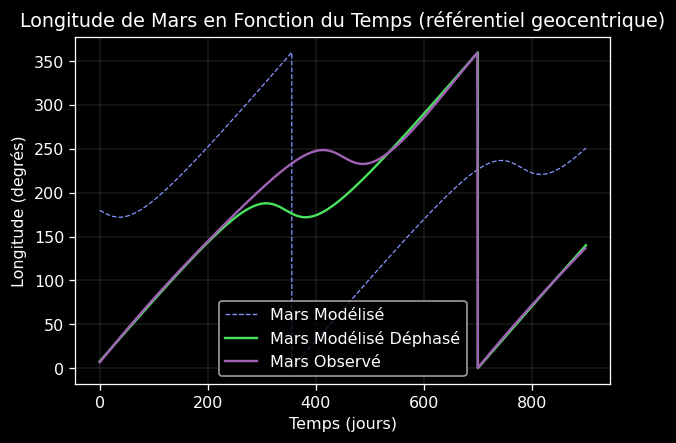

In [8]:
# Compenser pour le déphasage dans les coordonées
X_T_phase = R_T * np.cos(2*np.pi*(t+phase)/T_T)
Y_T_phase = R_T * np.sin(2*np.pi*(t+phase)/T_T)

X_M_phase = R_M * np.cos(2*np.pi*(t+phase)/T_M)
Y_M_phase = R_M * np.sin(2*np.pi*(t+phase)/T_M)

X_Geo_phase = X_M_phase - X_T_phase
Y_Geo_phase = Y_M_phase - Y_T_phase



# Calcul de la longitude avec les nouvelles coordonnées et changement d'unités ((rad -> deg)>0)
Longitude_Geo_phase = np.arctan2(Y_Geo_phase, X_Geo_phase)

Longitude_Geo_adjusted = 180/np.pi*Longitude_Geo + 180

Longitude_Geo_phase_adjusted = 180/np.pi*Longitude_Geo_phase + 180



plt.figure(dpi = size)

plt.plot(t, Longitude_Geo_adjusted, "--", color = "#8695FF", linewidth=0.8, label = "Mars Modélisé")
plt.plot(t, Longitude_Geo_phase_adjusted, color = "#4AE15E", label = "Mars Modélisé Déphasé")
plt.plot(np.arange(0,900,1), Longitude, color = "#A061B4", label = "Mars Observé")

plt.style.use("dark_background")
plt.grid(visible = True, linewidth=0.1)
plt.title("Longitude de Mars en Fonction du Temps (référentiel geocentrique)")
plt.xlabel("Temps (jours)")
plt.ylabel("Longitude (degrés)")
plt.legend()

plt.show()

## Comparaison entre Modèle et Données Réelles

On peut alors constater que le modèle permet de prédire l'éxistance du phenomène de mouvement retrograde, mais qu'il n'est pas adapté pour prédire sa position. Cela peut être du aux factuers non-considérés, par exemple le fait que les deux orbites sont, en réalité, eliptiques et non pas circulaires uniformes, ou bien que les deux rotations ne sont pas dans le même plan. Pour un modèle plus précis il faudra alors modéliser le mouvement à trois dimensions et utiliser les équations pour les orbites eliptiques.